**Objetivos**

Este capítulo abordará:
1. `matplotlib`.
2. `seaborn`.
3. Plotagem no Pandas.

In [1]:
# dados de Anscombe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


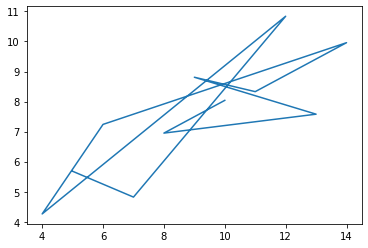

In [4]:
# cria subconjuntos de dados
dataset_1 = anscombe[anscombe["dataset"] == "I"]
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

plt.plot(dataset_1["x"], dataset_1["y"]) # padrão é desenhar linhas

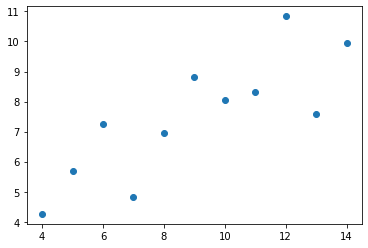

In [3]:
plt.plot(dataset_1["x"], dataset_1["y"], "o") # desenhando somente pontos

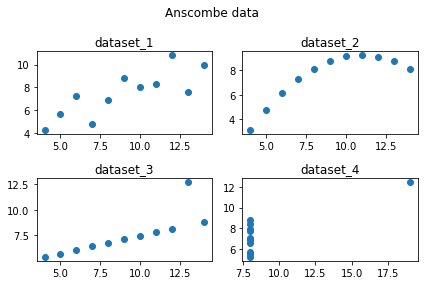

In [10]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig.suptitle("Anscombe data")

# usa um layout organizado
fig.tight_layout()

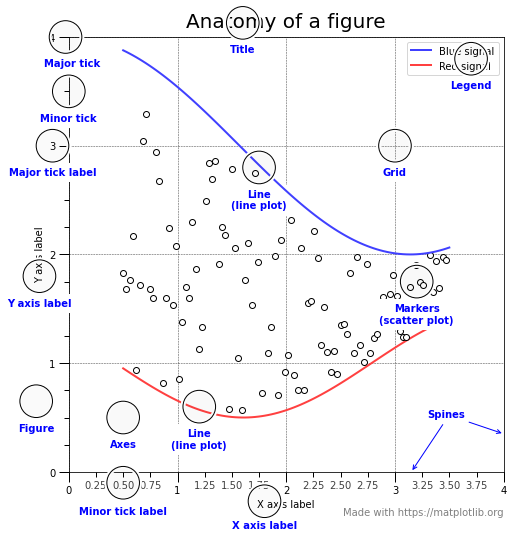

In [11]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# FuncFormatter is created and used automatically
ax.xaxis.set_minor_formatter(minor_tick)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend(loc="upper right")


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with https://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\User\AppData\Local\Temp/ipykernel_4040/2589013162.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


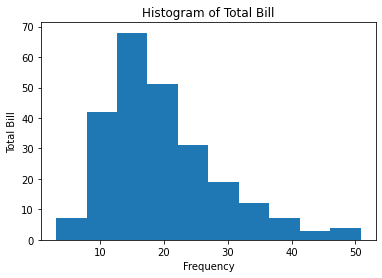

In [13]:
# histogramas
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips["total_bill"], bins = 10)
axes1.set_title("Histogram of Total Bill")
axes1.set_xlabel("Frequency")
axes1.set_ylabel("Total Bill")
fig.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4040/113757592.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  scatterplot.show()


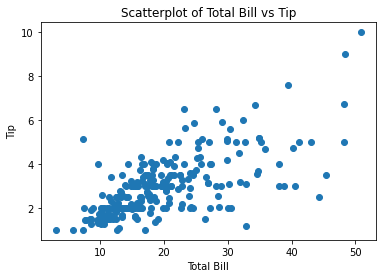

In [14]:
# gráficos de dispersão
scatterplot = plt.figure()
axes1 = scatterplot.add_subplot(1, 1, 1)
axes1.scatter(tips["total_bill"], tips["tip"])
axes1.set_title("Scatterplot of Total Bill vs Tip")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")
scatterplot.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4040/2180732758.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  boxplot.show()


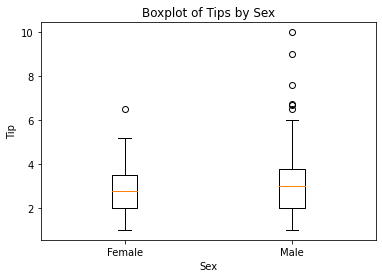

In [16]:
# gráfico de caixa
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([
    # o primeiro argumento de um boxplot é o dado, pois estamos plotando várias porções de dados;
    # temos que colocar cada porção de dados em uma lista
    tips[tips["sex"] == "Female"]["tip"],
    tips[tips["sex"] == "Male"]["tip"]],
    # podemos então passar um parâmetro labels opcional
    # para especificar um rótulo aos dados que passamos
    labels = ["Female", "Male"])

axes1.set_xlabel("Sex")
axes1.set_ylabel("Tip")
axes1.set_title("Boxplot of Tips by Sex")
boxplot.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4040/4077749300.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  scatterplot.show()


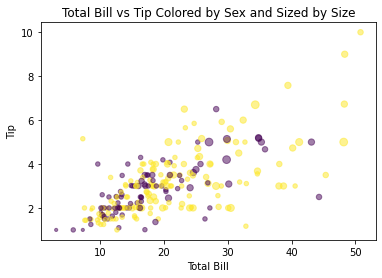

In [17]:
# gráfico de dispersão dividido por grupos

# cria uma variável de cor baseada no sexo
def recode_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(recode_sex)

scatterplot = plt.figure()
axes1 = scatterplot.add_subplot(1, 1, 1)
axes1.scatter(x = tips["total_bill"],
             y = tips["tip"],
             
             # define o tamanho dos pontos com base no tamanho dos grupos;
             # multiplicamos os valores por 10 para deixar os pontos maiores
             # e enfatizar as diferenças
             s = tips["size"] * 10,
             
             # define a cor para o sexo
             c = tips["sex_color"],
             
             # define o valor de alpha para que os pontos sejam mais transparentes;
             # isso ajuda no caso de pontos que se sobrepõem
             alpha = 0.5)

axes1.set_title("Total Bill vs Tip Colored by Sex and Sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")
scatterplot.show()

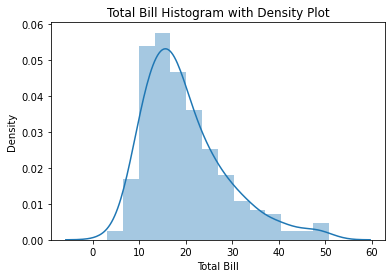

In [21]:
# histogramas no seaborn

# essa função subplots é um atalho para criar objetos separados de figuras e 
# adicionar subplotagens individuais (eixos) à figura
hist, ax = plt.subplots()

# usa a função distplot do seaborn para criar nossa plotagem
ax = sns.distplot(tips["total_bill"], kde = True) # kde = estimativa de densidade por kernel
ax.set_title("Total Bill Histogram with Density Plot")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Density")

plt.show() # ainda precisamos de matplotlib.pyplot para mostrar a figura

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


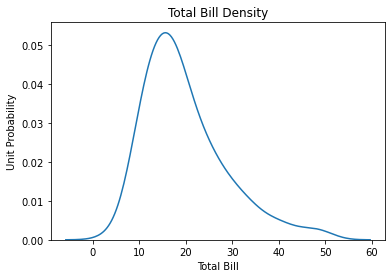

In [22]:
# plotagem de densidade no seaborn
den, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], hist = False)
ax.set_title("Total Bill Density")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Unit Probability")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


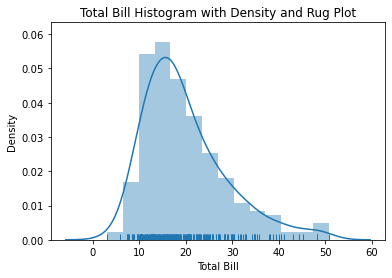

In [23]:
# rug plot (plotagem de tapete) no seaborn
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], rug = True)
ax.set_title("Total Bill Histogram with Density and Rug Plot")
ax.set_xlabel("Total Bill")
plt.show()

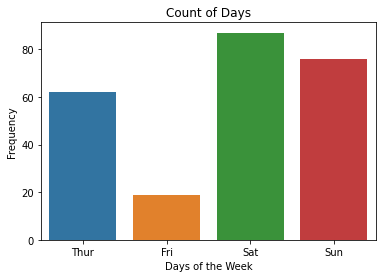

In [25]:
# gráfico de barras no seaborn
count, ax = plt.subplots()
ax = sns.countplot(x = "day", data = tips)
ax.set_title("Count of Days")
ax.set_xlabel("Days of the Week")
ax.set_ylabel("Frequency")
plt.show()


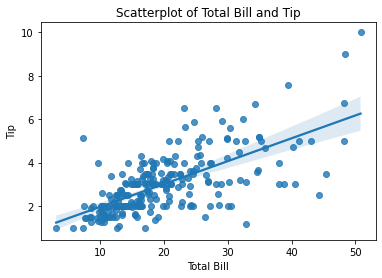

In [26]:
# gráfico de dispersão no seaborn
# regplot cria uma figura
scatter, ax = plt.subplots()
ax = sns.regplot(x = "total_bill", y = "tip", data = tips)
ax.set_title("Scatterplot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
plt.show()

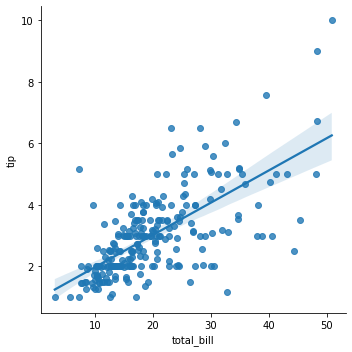

In [27]:
# lmplot cria eixos
fig = sns.lmplot(x = "total_bill", y = "tip", data = tips)
plt.show()

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

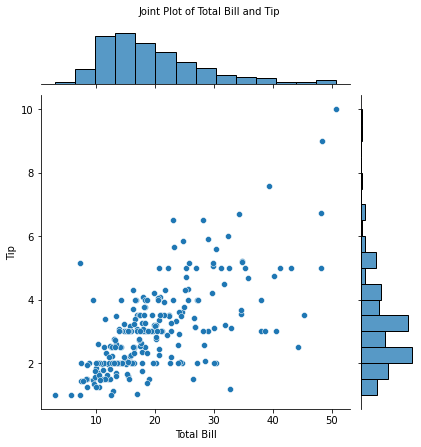

In [30]:
# jointplot cria diagrama de dispersão com distribuições marginais
joint = sns.jointplot(x = "total_bill", y = "tip", data = tips)
joint.set_axis_labels(xlabel = "Total Bill", ylabel = "Tip")
joint.fig.suptitle("Joint Plot of Total Bill and Tip", fontsize = 10, y = 1.03)

Text(0.5, 1.03, 'Hebin Joint Plot of Total Bill and Tip')

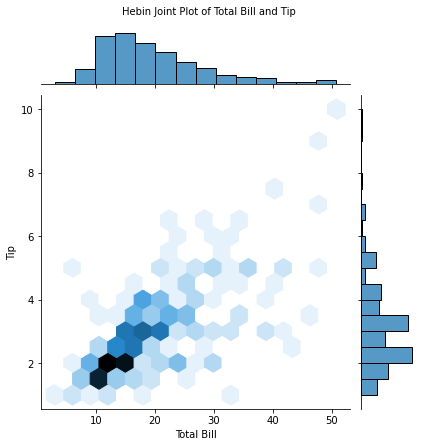

In [31]:
# plotagem hexabin no seaborn
hexbin = sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")
hexbin.set_axis_labels(xlabel = "Total Bill", ylabel = "Tip")
hexbin.fig.suptitle("Hebin Joint Plot of Total Bill and Tip", fontsize = 10, y = 1.03)

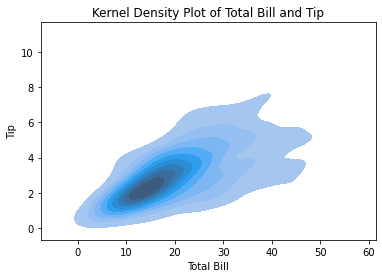

In [37]:
# plotagem de densidade 2D no seaborn
kde, ax = plt.subplots()
ax = sns.kdeplot(x = tips["total_bill"],
                y = tips["tip"],
                shade = True) # sombreado preencherá os contornos

ax.set_title("Kernel Density Plot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
plt.show()

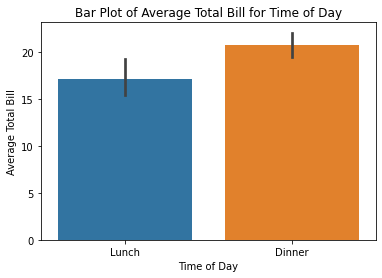

In [38]:
# plotagem de barras no seaborn
bar, ax = plt.subplots()
ax = sns.barplot(x = "time", y = "total_bill", data = tips)
ax.set_title("Bar Plot of Average Total Bill for Time of Day")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Total Bill")
plt.show()

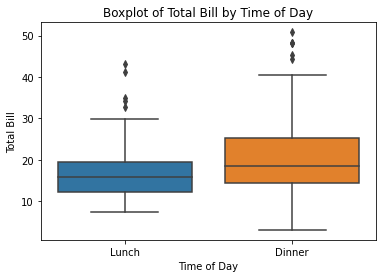

In [44]:
# gráfico de caixa no seaborn
box, ax = plt.subplots()
ax = sns.boxplot(x = "time", y = "total_bill", data = tips) # parâmetro x é opcional
ax.set_title("Boxplot of Total Bill by Time of Day")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Total Bill")
plt.show()

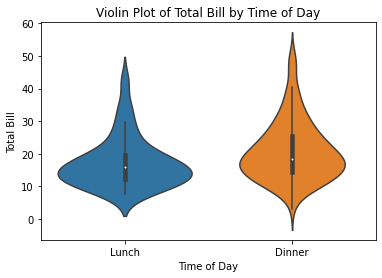

In [45]:
# violin plot no seaborn
violin, ax = plt.subplots()
ax = sns.violinplot(x = "time", y = "total_bill", data = tips)
ax.set_title("Violin Plot of Total Bill by Time of Day")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Total Bill")
plt.show()

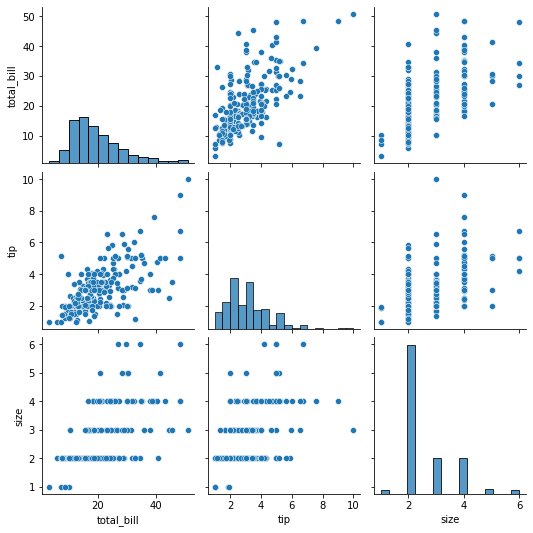

In [50]:
# relacionamentos aos pares (pairplot) no seaborn
fig = sns.pairplot(tips)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distribut

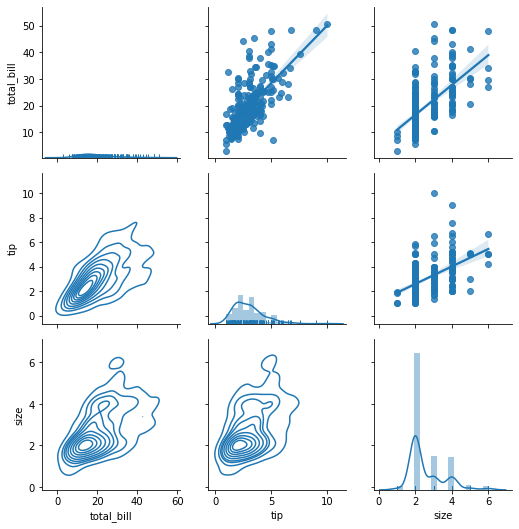

In [51]:
pair_grid = sns.PairGrid(tips)
# podemos usar plt.scatter em vez de sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)
plt.show()

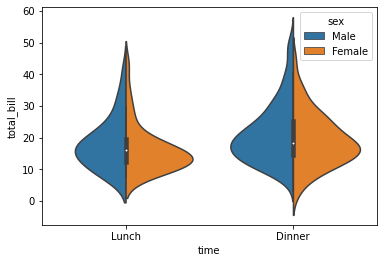

In [53]:
# violinplot por grupo
violin, ax = plt.subplots()
ax = sns.violinplot(x = "time", y = "total_bill",
                   hue = "sex", data = tips,
                   split = True)
plt.show()

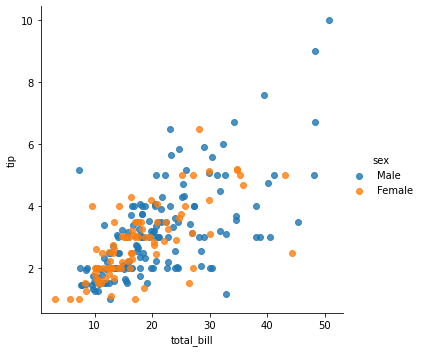

In [54]:
# scatterplot por grupo
scatter = sns.lmplot(x = "total_bill", y = "tip", data = tips,
                    hue = "sex", fit_reg = False)
plt.show()

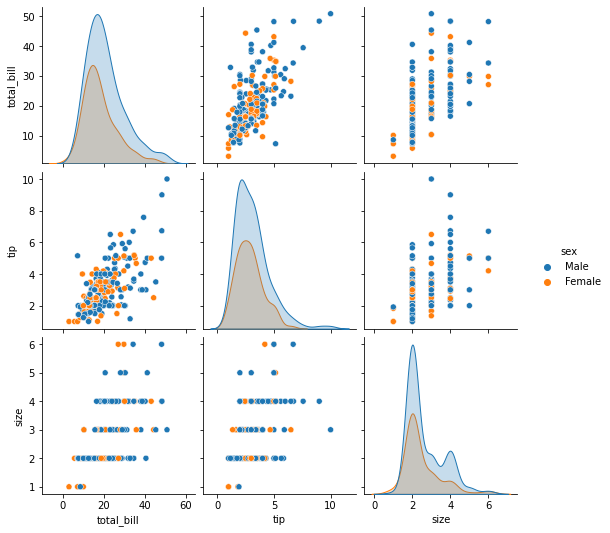

In [55]:
# pairplot por grupo
fig = sns.pairplot(tips, hue = "sex")

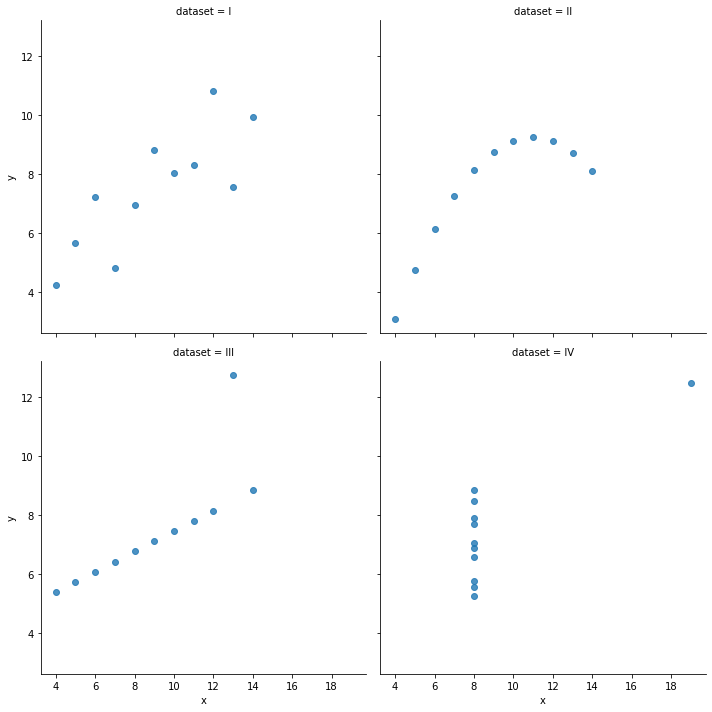

In [63]:
# facetas
anscombe_plot = sns.lmplot(x = "x", y = "y", data = anscombe,
                          fit_reg = False,
                          col = "dataset", # faceta de plotagem (painel)
                          col_wrap = 2)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distribut

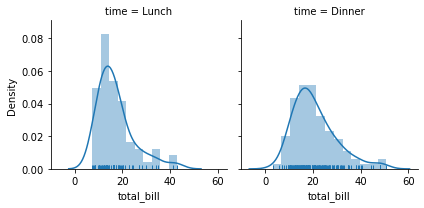

In [67]:
# cria o FacetGrid
facet = sns.FacetGrid(tips, col = "time")
# para cada valor de tempo, plota um histograma do total da conta
facet.map(sns.distplot, "total_bill", rug = True)
plt.show()

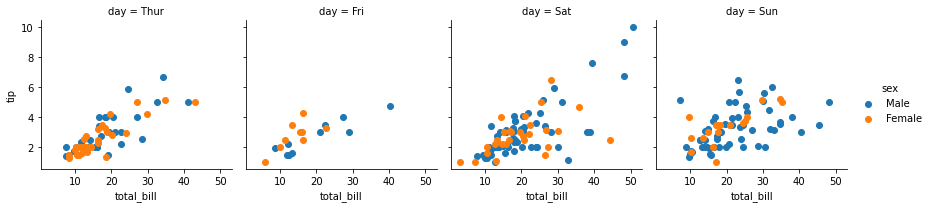

In [68]:
facet = sns.FacetGrid(tips, col = "day", hue = "sex")
facet = facet.map(plt.scatter, "total_bill", "tip")
facet = facet.add_legend()
plt.show()

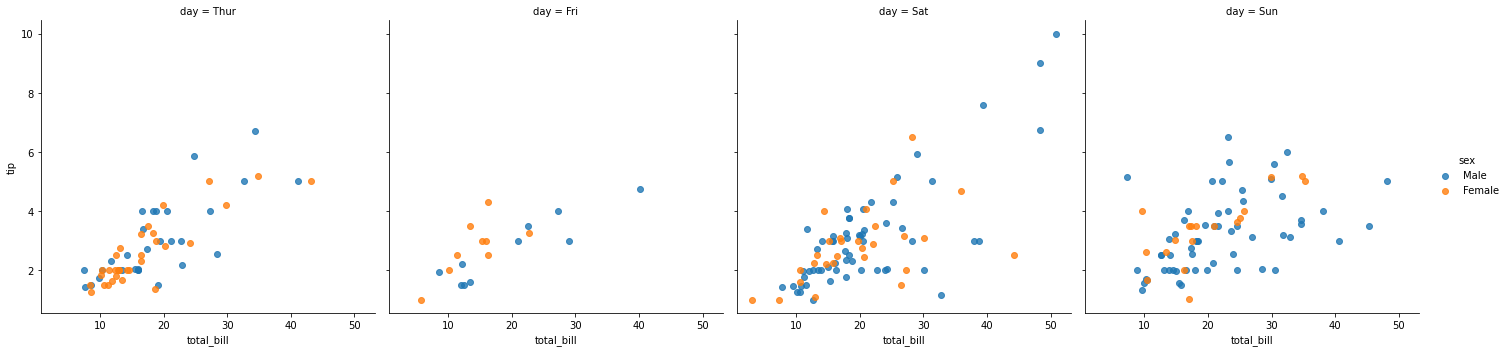

In [69]:
fig = sns.lmplot(x = "total_bill", y = "tip", data = tips, fit_reg = False,
                hue = "sex", col = "day")
plt.show()

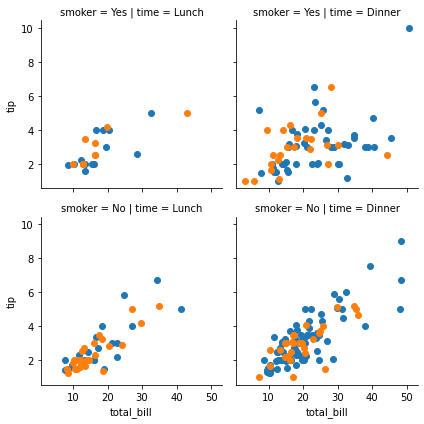

In [70]:
# uma faceta nas linhas e outra nas colunas
facet = sns.FacetGrid(tips, col = "time", row = "smoker", hue = "sex")
facet.map(plt.scatter, "total_bill", "tip")
plt.show()

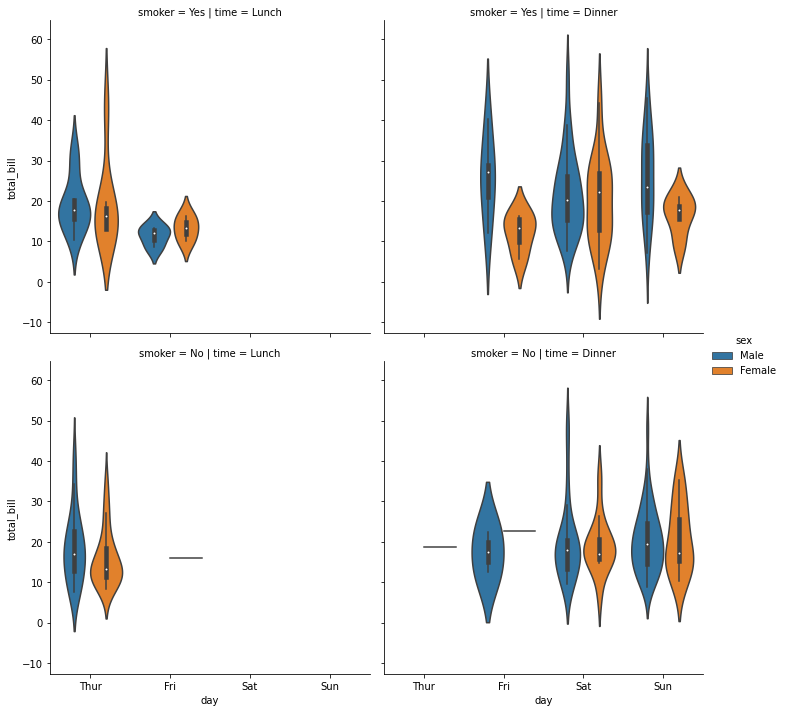

In [72]:
facet = sns.catplot(x = "day", y = "total_bill", hue = "sex", data = tips,
                      row = "smoker", col = "time", kind = "violin")

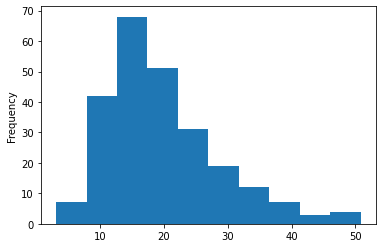

In [73]:
# histograma no Pandas
# em uma Series
fig, ax = plt.subplots()
ax = tips["total_bill"].plot.hist()
plt.show()

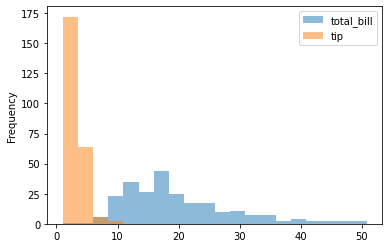

In [74]:
# em um dataframe
# define um canal de transparência alpha,
# de modo que possamos ver através das barras que se sobrepõem
fig, ax = plt.subplots()
ax = tips[["total_bill", "tip"]].plot.hist(alpha = 0.5, bins = 20, ax = ax)
plt.show()

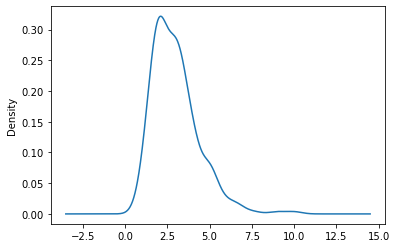

In [75]:
# plotagem de densidade no Pandas
fig, ax = plt.subplots()
ax = tips["tip"].plot.kde()
plt.show()

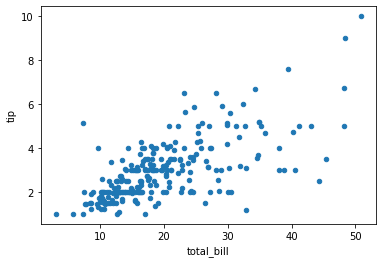

In [77]:
# gráfico de dispersão no Pandas
fig, ax = plt.subplots()
ax = tips.plot.scatter(x = "total_bill", y = "tip", ax = ax)
plt.show()

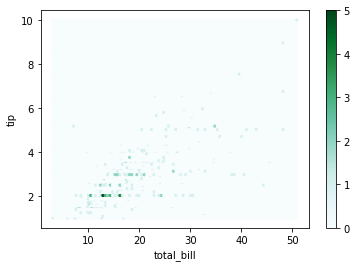

In [78]:
# plotagem hexbin no Pandas
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = "total_bill", y = "tip", ax = ax)
plt.show()

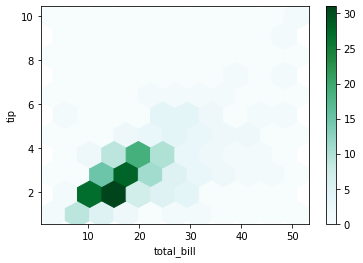

In [79]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = "total_bill", y = "tip", gridsize = 10, ax = ax)
plt.show()

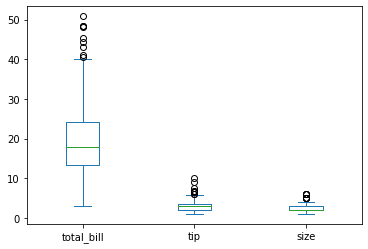

In [80]:
# gráficos de caixa no Pandas
fig, ax = plt.subplots()
ax = tips.plot.box(ax = ax)
plt.show()

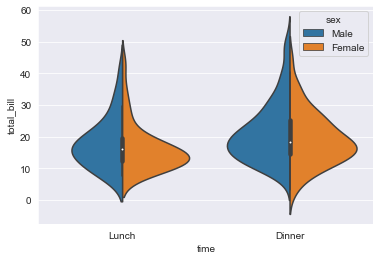

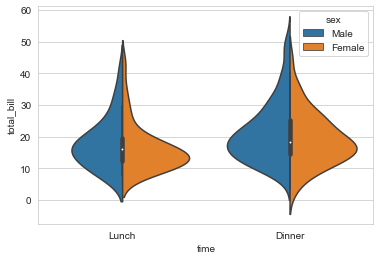

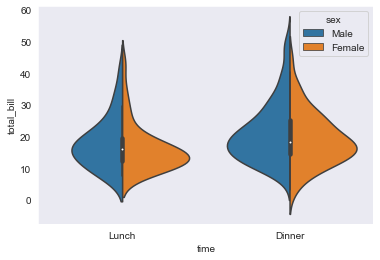

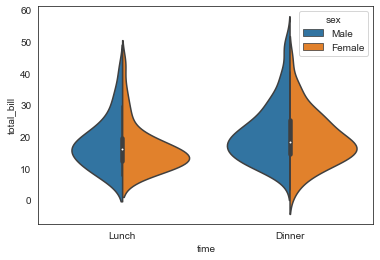

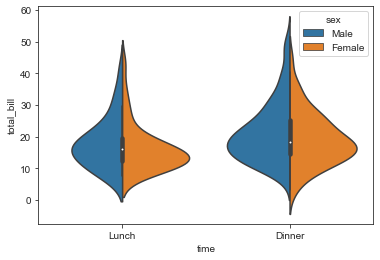

In [84]:
# estilos do seaborn
for style in ["darkgrid", "whitegrid", "dark", "white", "ticks"]:
    sns.set_style(style)
    fig, ax = plt.subplots()
    ax = sns.violinplot(x = "time", y = "total_bill",
                       hue = "sex", data = tips,
                       split = True)
    plt.show()


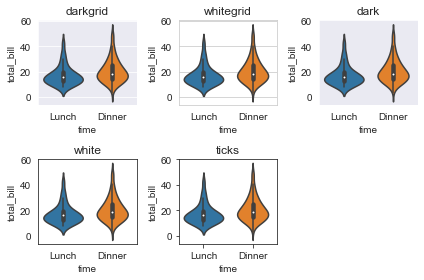

In [88]:
fig = plt.figure()
seaborn_styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x = "time", y = "total_bill", data = tips, ax = ax)
        violin.set_title(style)
fig.tight_layout()
plt.show()